<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Demo: How to run an sql query


In [36]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [4]:
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
dfmaster = pd.read_sql_query(QUERY,conn)
dfmaster.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

## Demo: How to list all tables


In [61]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM master
group by age
order by age ASC
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


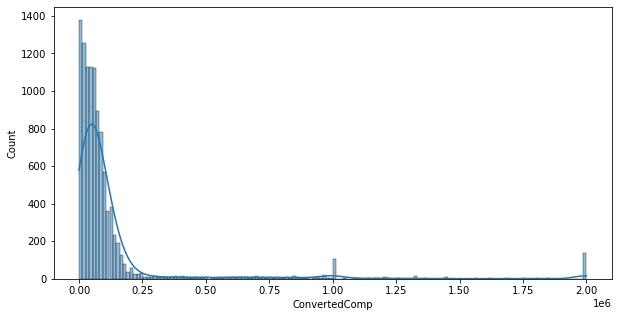

In [8]:
# your code goes here
plt.figure(figsize=(10,5))
sns.histplot(dfmaster['ConvertedComp'], bins=150, kde=True)
plt.show()

### Box Plots


Plot a box plot of `Age.`


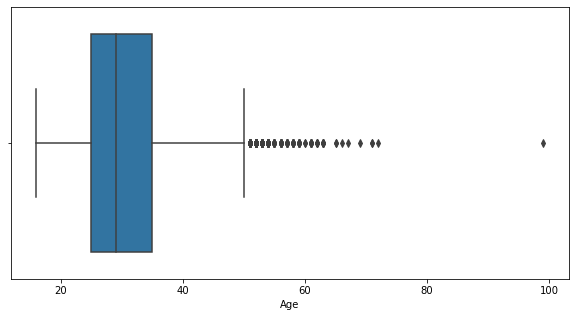

In [9]:
# your code goes here
plt.figure(figsize=(10,5))
sns.boxplot(data=dfmaster,x=dfmaster['Age'])
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


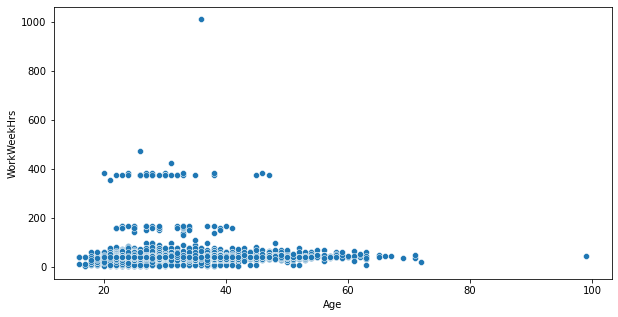

In [10]:
# your code goes here
plt.figure(figsize=(10,5))
sns.scatterplot(data=dfmaster, x=dfmaster['Age'], y=dfmaster['WorkWeekHrs'])
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


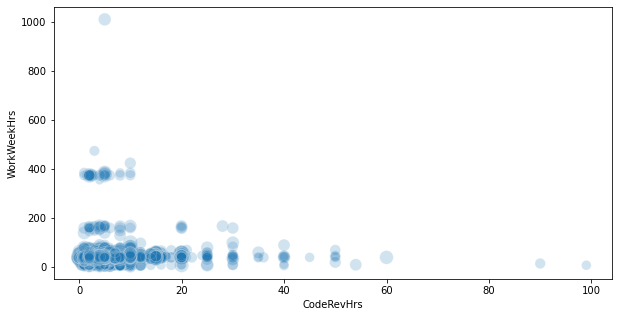

In [11]:
# your code goes here
plt.figure(figsize=(10,5))
sns.scatterplot(data=dfmaster, x=dfmaster['CodeRevHrs'], y=dfmaster['WorkWeekHrs'], 
                size=dfmaster['Age'],sizes=(50,500), legend=False, alpha=0.2)
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [49]:
dfDatabaseWorkedWith = pd.read_sql("SELECT * FROM DatabaseWorkedWith", conn)
dfDatabaseWorkedWith.DatabaseWorkedWith.value_counts()

MySQL                   5469
Microsoft SQL Server    4110
PostgreSQL              4097
SQLite                  3248
MongoDB                 3016
Redis                   2508
Elasticsearch           1954
Oracle                  1744
MariaDB                 1709
Firebase                1314
DynamoDB                 831
Other(s):                728
Cassandra                397
Couchbase                250
Name: DatabaseWorkedWith, dtype: int64

In [13]:
dfLanguageDesireNextYear = pd.read_sql("SELECT * FROM LanguageDesireNextYear", conn)
dfLanguageDesireNextYear.LanguageDesireNextYear.value_counts()

JavaScript               6630
HTML/CSS                 5328
Python                   5239
SQL                      5012
TypeScript               4088
C#                       3591
Bash/Shell/PowerShell    3097
Java                     2953
Go                       2759
Kotlin                   1890
C++                      1633
Rust                     1520
PHP                      1457
WebAssembly              1397
Swift                    1179
Ruby                     1029
C                        1028
Scala                     879
R                         850
Other(s):                 836
F#                        621
Elixir                    620
Dart                      610
Clojure                   413
Assembly                  336
Erlang                    310
Objective-C               310
VBA                       149
Name: LanguageDesireNextYear, dtype: int64

In [14]:
dfDesire = pd.read_sql('SELECT * FROM DatabaseDesireNextYear', conn)

In [15]:
y = dfDesire.groupby('DatabaseDesireNextYear').count()
y = y.sort_values(by='Respondent', ascending=False)
y = y.nlargest(5,'Respondent')
y.Respondent

DatabaseDesireNextYear
PostgreSQL       4328
MongoDB          3649
Redis            3331
MySQL            3281
Elasticsearch    2856
Name: Respondent, dtype: int64

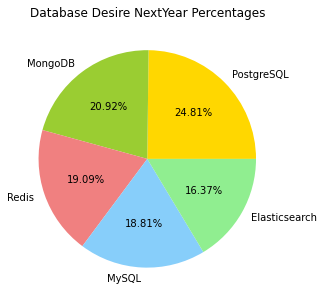

In [16]:
# your code goes here
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

plt.figure(figsize=(10,5))
plt.pie(y.Respondent, labels=['PostgreSQL','MongoDB','Redis','MySQL','Elasticsearch'],
       autopct='%.2f%%',colors=colors_list)
plt.title("Database Desire NextYear Percentages")
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [17]:
# your code goes here
dfmaster.WorkWeekHrs.median()

40.0

In [18]:
dfmaster.CodeRevHrs.median()

4.0

In [19]:
age = dfmaster[(dfmaster.Age >= 30) & (dfmaster.Age <= 35)]
age.head(1)

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
5,5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,31.0,No,Yes,Too long,Easy


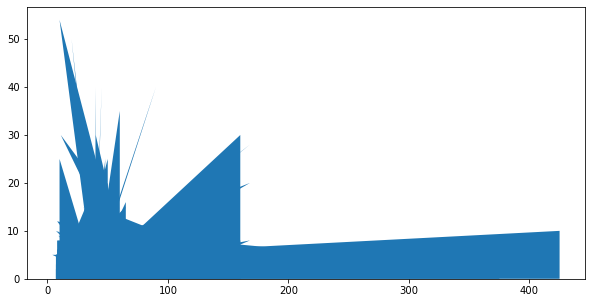

In [20]:
plt.figure(figsize=(10,5))
plt.stackplot(age.WorkWeekHrs, age.CodeRevHrs)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


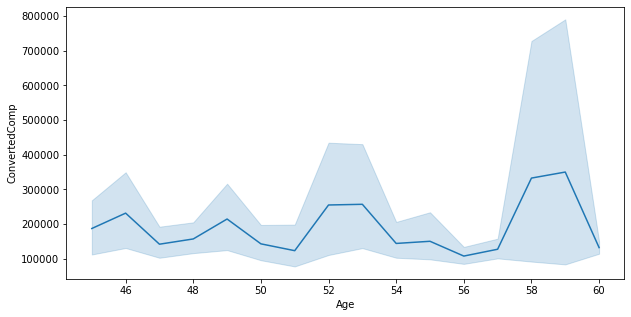

In [21]:
# your code goes here
Age = dfmaster[(dfmaster.Age >= 45) & (dfmaster.Age <= 60)]
plt.figure(figsize=(10,5))
sns.lineplot(data=Age, x=Age.Age, y=Age.ConvertedComp)
plt.show()

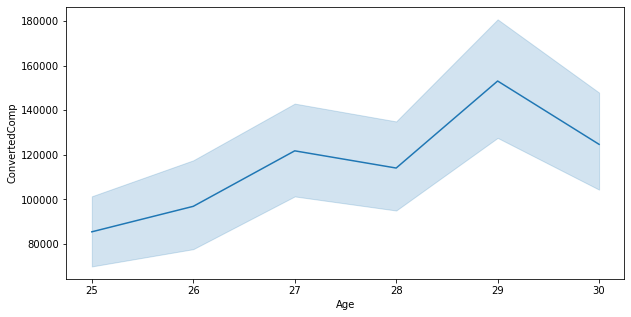

In [56]:
Age = dfmaster[(dfmaster.Age >= 25) & (dfmaster.Age <= 30)]
plt.figure(figsize=(10,5))
sns.lineplot(data=Age, x=Age.Age, y=Age.ConvertedComp)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


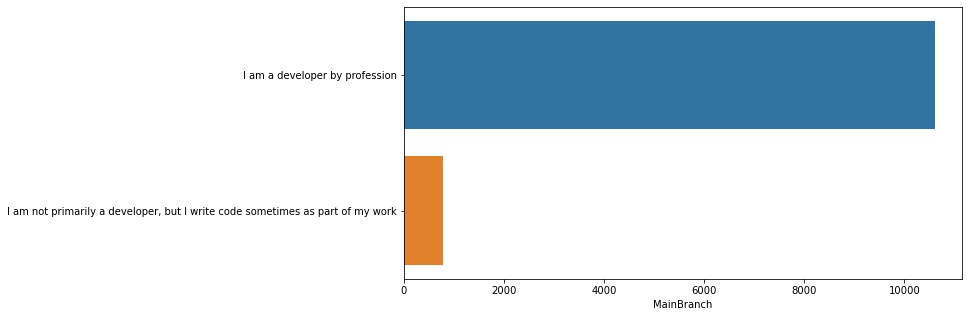

In [22]:
# your code goes here
dfMainBranch = pd.DataFrame(dfmaster.MainBranch.value_counts())
plt.figure(figsize=(10,5))
sns.barplot(x=dfMainBranch.MainBranch, y=dfMainBranch.index, orient='h')
plt.show()

Close the database connection.


In [48]:
dfSQL = pd.read_sql('Select * From LanguageWorkedWith', conn)
x = dfSQL.groupby('LanguageWorkedWith').count()
x = x.sort_values(by='Respondent', ascending=False)
x = x.nlargest(5,'Respondent')
x.head()


,Respondent
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542


In [40]:
sql_current_language = pd.read_sql(""" select LanguageWorkedWith, count(Respondent) as Count from LanguageWorkedWith  where LanguageWorkedWith = 'SQL'""", conn)
sql_current_language

,LanguageWorkedWith,Count
0,SQL,7106


In [41]:
mysql_only = pd.read_sql(""" select LanguageWorkedWith, count(Respondent) as Count from LanguageWorkedWith  where LanguageWorkedWith = 'MySQL'""", conn)
mysql_only

,LanguageWorkedWith,Count
0,None,0


In [55]:
QUERY="""
SELECT DatabaseWorkedWith,count(Respondent)
FROM DatabaseWorkedWith
group by Respondent having count(DatabaseWorkedWith)=1 and DatabaseWorkedWith='MySQL'"""
df2=pd.read_sql_query(QUERY,conn)
df2

,DatabaseWorkedWith,count(Respondent)
0,MySQL,1
1,MySQL,1
2,MySQL,1
3,MySQL,1
4,MySQL,1
...,...,...
469,MySQL,1
470,MySQL,1
471,MySQL,1
472,MySQL,1


In [65]:
dfDevType = pd.read_sql(" Select * From DevType", conn)
dfDevType.DevType.value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

In [139]:
#conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
